<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/seunghyeon/Exercise12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 심화문제 12.3
- 나만의 오토인코더를 만들어 손글씨 데이터를 이용하여 숫자 3 표현하는 데이터의 잠재표현을 추출하라

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                589888    
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [12]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9216)              599040    
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 26, 26, 16)        2320      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 137s 73ms/step - loss: 866.6715
Epoch 2/15
1875/1875 [==============================] - 138s 73ms/step - loss: 353.0177
Epoch 3/15
1875/1875 [==============================] - 139s 74ms/step - loss: 270.5164
Epoch 4/15
1875/1875 [==============================] - 139s 74ms/step - loss: 233.9359
Epoch 5/15
1875/1875 [==============================] - 138s 74ms/step - loss: 213.0508
Epoch 6/15
1875/1875 [==============================] - 138s 74ms/step - loss: 197.5400
Epoch 7/15
1875/1875 [==============================] - 139s 74ms/step - loss: 185.2924
Epoch 8/15
1875/1875 [==============================] - 140s 75ms/step - loss: 176.5524
Epoch 9/15
1875/1875 [==============================] - 139s 74ms/step - loss: 170.0029
Epoch 10/15
1875/1875 [==============================] - 141s 75ms/step - loss: 164.8202
Epoch 11/15
1875/1875 [==============================] - 141s 75ms/step - loss: 160.1273
Epoch 12/15
1875/1875 [=======

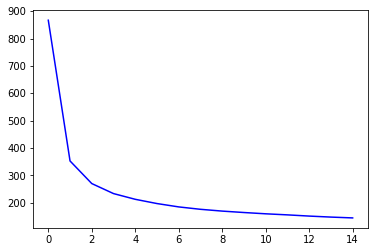

In [13]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')

X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

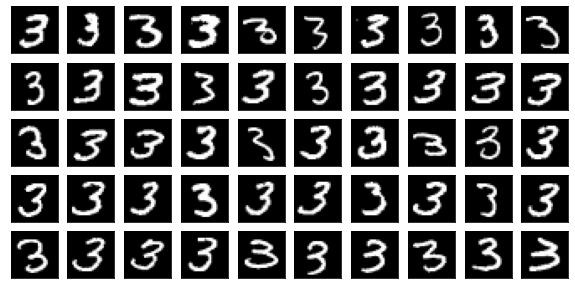

In [14]:
idx = train_labels == 3    # 드레스의 클래스 번호는 3
arr = train_images[idx]
plot_images(5, 10, array.reshape(-1, 28, 28))

(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

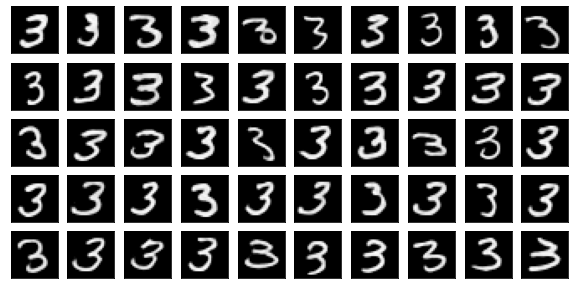

In [30]:
print(train_images.shape)
arr = arr.reshape(-1,28,28, 1)
encoded = enc_cnn.predict(arr)
recovered = dec_cnn.predict(encoded)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

## LAB 12.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # 롤 데이터 생성하기    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

m = 1500
X, color = make_a_roll(m)

from tensorflow.keras import models
from tensorflow.keras import layers
enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                         activation = 'elu')])
dec = models.Sequential([layers.Dense(3, input_shape=[2], 
                                         activation = 'elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 8         
_________________________________________________________________
sequential_1 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
47/47 [==============================] - 1s 1ms/step - loss: 0.6156
Epoch 2/30
47/47 [==============================] - 0s 1ms/step - loss: 0.5485
Epoch 3/30
47/47 [==============================] - 0s 1ms/step - loss: 0.4917
Epoch 4/30
47/47 [==============================] - 0s 1ms/step - loss: 0.4422
Epoch 5/30
47/47 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 6/30
47/47 [==============================] - 0s 1ms/step - loss: 0.3571
Epoch 7/30
47/47 [==============================] - 0s 1ms/step - loss: 0.3217
Epoch 8/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2911
Epoch 9/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2637
Epoch 10/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2408
Epoch 11/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2212
Epoch 12/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2050
Epoch 13/30
47/47 [==============================

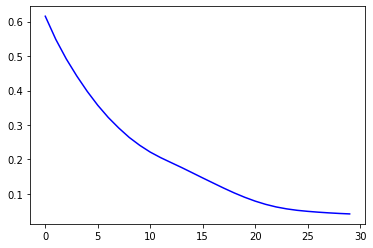

In [ ]:
history = AE.fit(X, X, epochs = 30)
plt.plot(history.history['loss'], 'b-')

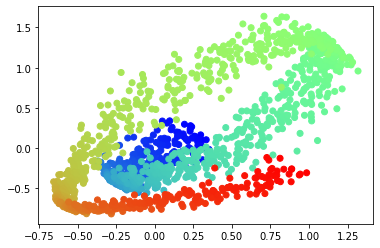

In [ ]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()


## LAB 12.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # Creating dataset    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T    

m = 1500
X, color = make_a_roll(m)

from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(2, activation='elu')])
dec = models.Sequential([layers.Dense(2, input_shape=[2],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(3, activation='elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
history = AE.fit(X, X, epochs = 30)

Epoch 1/30
47/47 [==============================] - 1s 2ms/step - loss: 0.3996
Epoch 2/30
47/47 [==============================] - 0s 1ms/step - loss: 0.3286
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2850
Epoch 4/30
47/47 [==============================] - 0s 1ms/step - loss: 0.2613
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2275
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.2003
Epoch 8/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1704
Epoch 9/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1446
Epoch 10/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1265
Epoch 11/30
47/47 [==============================] - 0s 1ms/step - loss: 0.1162
Epoch 12/30
47/47 [==============================] - 0s 2ms/step - loss: 0.1097
Epoch 13/30
47/47 [==============================

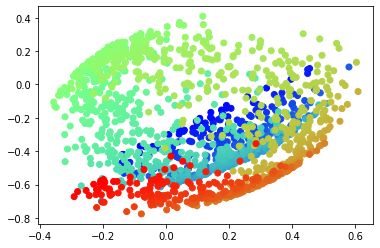

In [ ]:
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

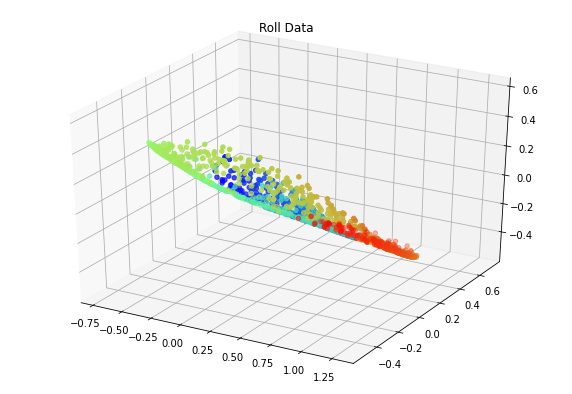

In [ ]:

rcvrd = dec.predict(reduced)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(rcvrd[:,0], rcvrd[:,1], rcvrd[:,2], color = color)
plt.title("Roll Data")
plt.show()

## LAB 12.3

In [ ]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(64, input_shape=(784, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(64, activation='elu')])
dec = models.Sequential([layers.Dense(64, input_shape=(64, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(784, activation='elu')])

AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()


(60000, 28, 28) (10000, 28, 28)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 64)                58560     
_________________________________________________________________
sequential_7 (Sequential)    (None, 784)               59280     
Total params: 117,840
Trainable params: 117,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = train_images.reshape(-1, 28*28)
history = AE.fit(X, X, epochs = 15)
plt.plot(history.history['loss'], 'b-')

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2139.5178
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1296.0477
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1141.3008
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1069.6299
Epoch 5/15
1141/1875 [=================>............] - ETA: 2s - loss: 1041.3719

KeyboardInterrupt: ignored

##LAB 12.4

In [ ]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

from tensorflow.keras import models
from tensorflow.keras import layers

enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

In [ ]:
# 드레스만 인코딩하여 잠재표현을 얻자
dress_idx = train_labels == 3    # 드레스의 클래스 번호는 3
dress_array = train_images[dress_idx]
plot_images(5, 10, dress_array.reshape(-1, 28, 28))

In [ ]:
print(train_images.shape)
dress_array = dress_array.reshape(-1,28,28, 1)
dress_encoded = enc_cnn.predict(dress_array)
plot_images(5, 10, dress_encoded.reshape(-1, 10, 10))

In [ ]:
dress_latent = dress_encoded.mean(axis = 0)
plt.imshow(dress_latent.reshape(10,10), cmap='gray')

In [ ]:
dress_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_dress = dress_latent*(1+np.random.randn(100)*0.3)
    dress_latent_augmented.append(new_dress)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
dress_latent_augmented = np.array(dress_latent_augmented)

dress_generated = dec_cnn.predict([dress_latent_augmented])
plot_images(5, 10, dress_generated.reshape(-1, 28, 28))